In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
# Dosyayı Drive'dan Colab'a kopyalar
!cp /content/drive/MyDrive/dataset.zip .

# Zip'i açar
!unzip -q dataset.zip

# Klasörün gelip gelmediğini kontrol edelim
!ls

dataset  dataset.zip  drive  sample_data


In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Ayarlar
batch_size = 16
img_height = 128
img_width = 128

# Eğitim seti
train_ds = tf.keras.utils.image_dataset_from_directory(
  'dataset',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

# Test (Doğrulama) seti
val_ds = tf.keras.utils.image_dataset_from_directory(
  'dataset',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

# Sınıf isimlerini kontrol edelim
class_names = train_ds.class_names
print(f"Sınıflar: {class_names}")

Found 133 files belonging to 2 classes.
Using 107 files for training.
Found 133 files belonging to 2 classes.
Using 26 files for validation.
Sınıflar: ['cay_bardagi', 'kupa']


In [5]:
model2 = models.Sequential([
  # Pikselleri 0-1 arasına getir (Normalizasyon)
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

  # 1. Katman
  layers.Conv2D(32, (3, 3), activation='relu'),
  layers.MaxPooling2D(),

  # 2. Katman
  layers.Conv2D(64, (3, 3), activation='relu'),
  layers.MaxPooling2D(),

  # Tam bağlantı katmanları
  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  layers.Dense(1, activation='sigmoid') # İki sınıf (Kupa/Bardak) için sigmoid
])

model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Eğitimi başlat
history2 = model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=15
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 704ms/step - accuracy: 0.4482 - loss: 1.4277 - val_accuracy: 0.3077 - val_loss: 1.4255
Epoch 2/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 320ms/step - accuracy: 0.6246 - loss: 0.7488 - val_accuracy: 0.6923 - val_loss: 0.6079
Epoch 3/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 316ms/step - accuracy: 0.5364 - loss: 0.6747 - val_accuracy: 0.4231 - val_loss: 0.6881
Epoch 4/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 315ms/step - accuracy: 0.8231 - loss: 0.5799 - val_accuracy: 0.6923 - val_loss: 0.5877
Epoch 5/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 467ms/step - accuracy: 0.8586 - loss: 0.4318 - val_accuracy: 0.6538 - val_loss: 0.6130
Epoch 6/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 346ms/step - accuracy: 0.9217 - loss: 0.2591 - val_accuracy: 0.5385 - val_loss: 0.7214
Epoch 7/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 319ms/step - accuracy: 0.9831 - loss: 0.1496 - val_accuracy: 0.8077 - val_loss: 0.5190
Epoch 8/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 277ms/step - accuracy: 0.9671 - loss: 0.1240 - val_accuracy: 0.8462 - val_loss

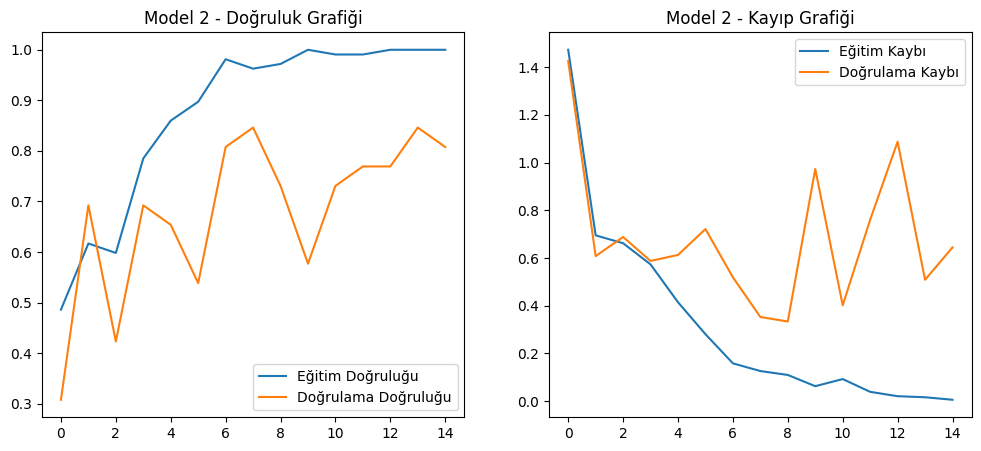

In [6]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs_range = range(15)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Eğitim Doğruluğu')
plt.plot(epochs_range, val_acc, label='Doğrulama Doğruluğu')
plt.title('Model 2 - Doğruluk Grafiği')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Eğitim Kaybı')
plt.plot(epochs_range, val_loss, label='Doğrulama Kaybı')
plt.title('Model 2 - Kayıp Grafiği')
plt.legend()
plt.show()

In [7]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models

# 1. Hazır modeli (VGG16) yükle
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# 2. Hazır ağırlıkları dondur (değişmesinler)
base_model.trainable = False

# 3. Kendi sınıflarımızı ekle
model1 = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5), # Ezberlemeyi önlemek için ekledik
    layers.Dense(1, activation='sigmoid')
])

model1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 4. Eğitimi başlat
history1 = model1.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10 # Transfer learning daha hızlı öğrenir, 10 yeterli olabilir
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.6521 - loss: 18.3906 - val_accuracy: 0.8077 - val_loss: 4.2489
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 362ms/step - accuracy: 0.8105 - loss: 5.8677 - val_accuracy: 0.8846 - val_loss: 4.9966
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 436ms/step - accuracy: 0.9720 - loss: 0.4035 - val_accuracy: 0.8846 - val_loss: 4.8236
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 323ms/step - accuracy: 0.9649 - loss: 0.3985 - val_accuracy: 0.8846 - val_loss: 2.5179
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 292ms/step - accuracy: 1.0000 - loss: 5.3747e-05 - val_accuracy: 0.9231 - val_loss: 1.1703
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 320ms/step - accuracy: 0.9902 - loss: 0.4464 - val_accuracy: 1.0000 - val_loss: 1.7127e-05
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 525ms/step - accuracy: 1.0000 - loss: 5.9734e-07 - val_accuracy: 1.0000 - val_loss: 6.6756e-13
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 318ms/step - 

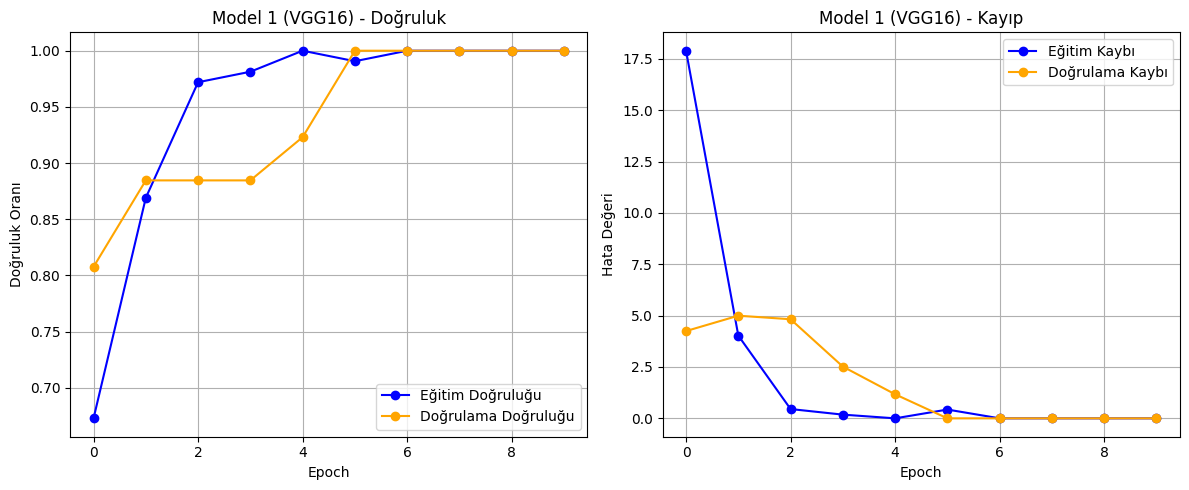

In [8]:
import matplotlib.pyplot as plt

# Model 1 için doğruluk ve kayıp verileri
acc1 = history1.history['accuracy']
val_acc1 = history1.history['val_accuracy']
loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']
epochs_range = range(len(acc1))

plt.figure(figsize=(12, 5))

# Doğruluk Grafiği
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc1, label='Eğitim Doğruluğu', color='blue', marker='o')
plt.plot(epochs_range, val_acc1, label='Doğrulama Doğruluğu', color='orange', marker='o')
plt.title('Model 1 (VGG16) - Doğruluk')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk Oranı')
plt.legend(loc='lower right')
plt.grid(True)

# Kayıp Grafiği
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss1, label='Eğitim Kaybı', color='blue', marker='o')
plt.plot(epochs_range, val_loss1, label='Doğrulama Kaybı', color='orange', marker='o')
plt.title('Model 1 (VGG16) - Kayıp')
plt.xlabel('Epoch')
plt.ylabel('Hata Değeri')
plt.legend(loc='upper right')
plt.grid(True)

plt.tight_layout()
plt.show()

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers

# 1. Veri Artırımı (Online Data Augmentation)
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,      # Resmi 20 derece döndür
    width_shift_range=0.2,  # Sağa sola kaydır
    height_shift_range=0.2, # Yukarı aşağı kaydır
    horizontal_flip=True,   # Yatay çevir
    validation_split=0.2    # %20 ayır
)

# Yeniden yükleme (Augmentation ile)
train_generator = datagen.flow_from_directory(
    'dataset',
    target_size=(128, 128),
    batch_size=16,
    class_mode='binary',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    'dataset',
    target_size=(128, 128),
    batch_size=16,
    class_mode='binary',
    subset='validation'
)

# 2. Model 3 Mimarisi (Geliştirilmiş)
model3 = models.Sequential([
    layers.Input(shape=(128, 128, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, (3, 3), activation='relu'), # Yeni katman ve filtre artışı
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.4), # Dropout eklendi
    layers.Dense(1, activation='sigmoid')
])

# 3. Öğrenme Oranı Değişikliği
opt = optimizers.Adam(learning_rate=0.0005) # 0.001 yerine 0.0005

model3.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 4. Eğitim
history3 = model3.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20 # Veri artırımı olduğu için biraz daha uzun eğitmek iyidir
)

Found 107 images belonging to 2 classes.
Found 26 images belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.4115 - loss: 0.9219 - val_accuracy: 0.5000 - val_loss: 0.6956
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 490ms/step - accuracy: 0.5298 - loss: 0.6830 - val_accuracy: 0.5769 - val_loss: 0.6908
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 714ms/step - accuracy: 0.5717 - loss: 0.6873 - val_accuracy: 0.4231 - val_loss: 0.6922
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 471ms/step - accuracy: 0.5678 - loss: 0.6843 - val_accuracy: 0.6154 - val_loss: 0.6865
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 488ms/step - accuracy: 0.6078 - loss: 0.6805 - val_accuracy: 0.4231 - val_loss: 0.6940
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 504ms/step - accuracy: 0.6884 - loss: 0.6717 - val_accuracy: 0.5769 - val_loss: 0.6734
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 680ms/step - accuracy: 0.7281 - loss: 0.6436 - val_accuracy: 0.5769 - val_loss: 0.6889
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 482ms/step - accuracy: 0.7142 - loss: 0.6116 - val_accuracy: 0.5385 - val_loss: 0

In [ ]:
# Sadece modeli yeniden tanımlayıp 50 epoch eğiteceğiz
model3_v2 = models.Sequential([
    layers.Input(shape=(128, 128, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2), # Dropout'u azalttık
    layers.Dense(1, activation='sigmoid')
])

model3_v2.compile(optimizer=optimizers.Adam(learning_rate=0.0005),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history3_v2 = model3_v2.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50 # Süreyi uzattık
)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 913ms/step - accuracy: 0.4828 - loss: 0.7740 - val_accuracy: 0.5000 - val_loss: 0.7080
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 481ms/step - accuracy: 0.5564 - loss: 0.6826 - val_accuracy: 0.5769 - val_loss: 0.6905
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 711ms/step - accuracy: 0.4447 - loss: 0.6931 - val_accuracy: 0.5769 - val_loss: 0.6900
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 502ms/step - accuracy: 0.6424 - loss: 0.6876 - val_accuracy: 0.6923 - val_loss: 0.6799
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 485ms/step - accuracy: 0.6944 - loss: 0.6707 - val_accuracy: 0.5769 - val_loss: 0.6624
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 538ms/step - accuracy: 0.5886 - loss: 0.6602 - val_accuracy: 0.4615 - val_loss: 0.7079
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 606ms/step - accuracy: 0.6513 - loss: 0.6315 - val_accuracy: 0.5769 - val_loss: 0.6840
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 478ms/step - accuracy: 0.5985 - loss: 0.6552 - val_accuracy: 0.4615 - val_loss